In [1]:
import matplotlib.pyplot as plt
import numpy as np

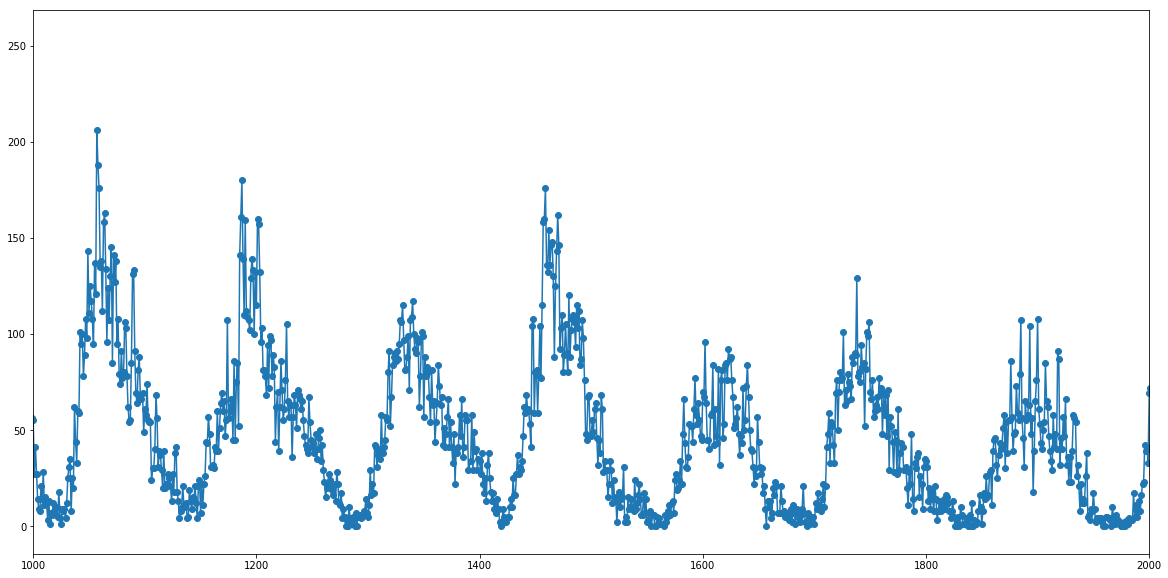

In [2]:
dataset = np.empty((0,2))

with open("data/sunspot.txt", "r") as file:
    data = file.readlines()
    for i, line in enumerate(data):
        #print(line)
        if i > 2 and i < 3080:
            words = line.split(" ")
            #print(words[-1][:-1])
            if len(words)==1: continue
            dataset = np.append(dataset, [[i-2, float(words[-1][:-1])]],\
                               axis=0)
            
#print(dataset)

X = dataset[:,0]
Y = dataset[:,1]

plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.xlim(1000,2000)
plt.show()

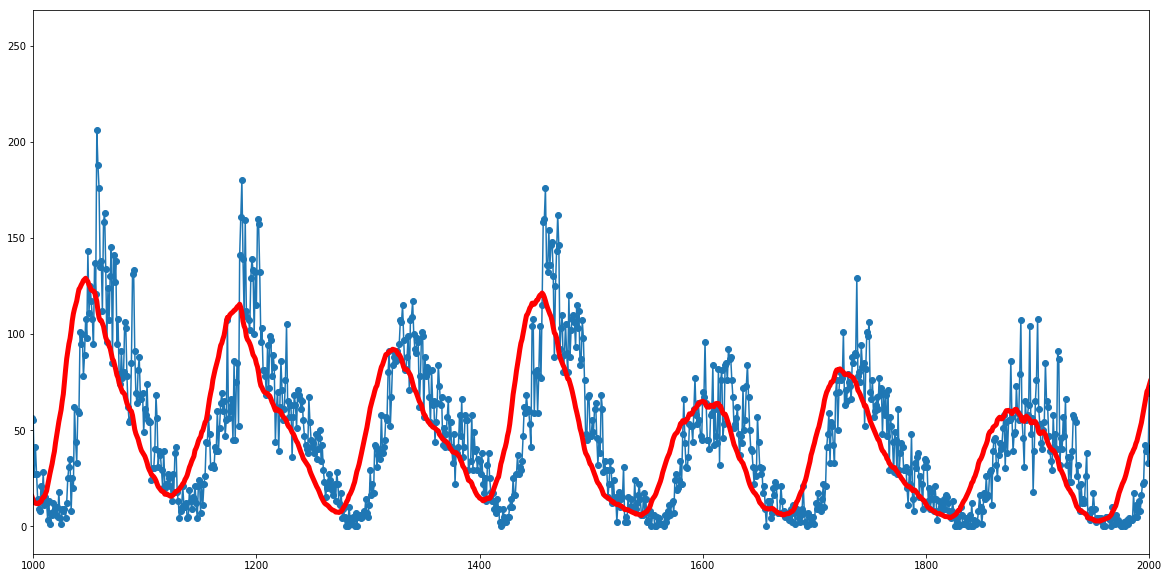

In [4]:
def moving_average(series, windowsize):
    results = [series[0]]
    for n in range(1, len(series)-windowsize):
        results.append(sum(series[n+i] for i in range(windowsize))\
                      /float(windowsize))
    return results

Y_ma = moving_average(Y, 30)

plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_ma)], Y_ma, "red", linewidth=5)
plt.xlim(1000,2000)
plt.show()

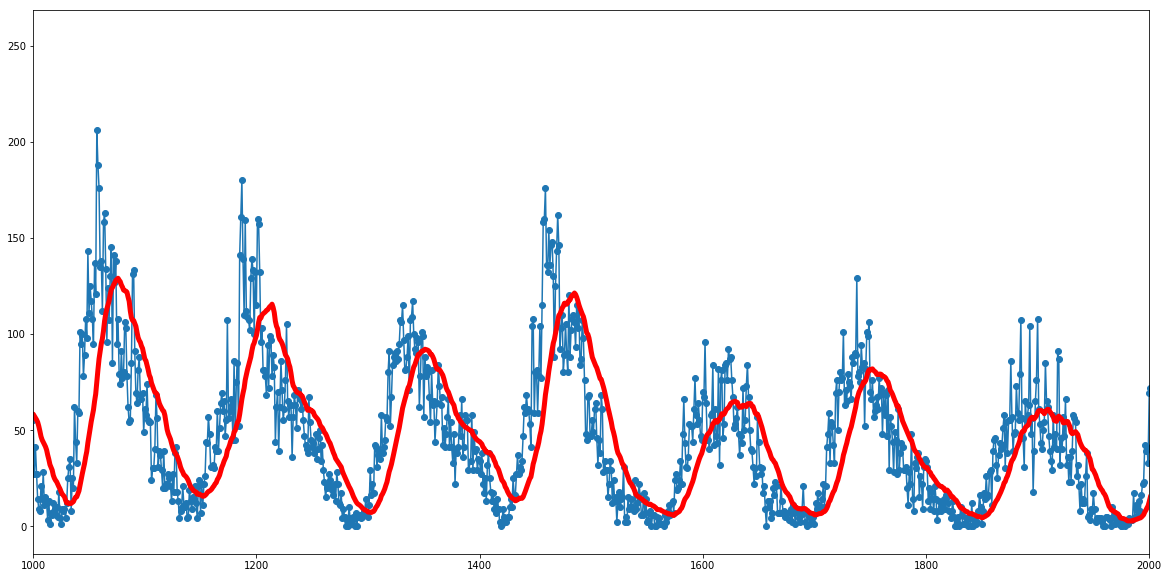

In [5]:
def moving_average(series, windowsize):
    results = [series[windowsize]]
    for n in range(windowsize, len(series)):
        results.append(sum(series[n-i] for i in range(windowsize))\
                      /float(windowsize))
    return results

windowsize = 30
Y_ma = moving_average(Y, windowsize)

plt.figure(figsize=(20,10))
plt.plot(X[windowsize:],Y[windowsize:])
plt.scatter(X[windowsize:],Y[windowsize:])
plt.plot(X[windowsize-1:], Y_ma, "red", linewidth=5)
plt.xlim(1000,2000)
plt.show()

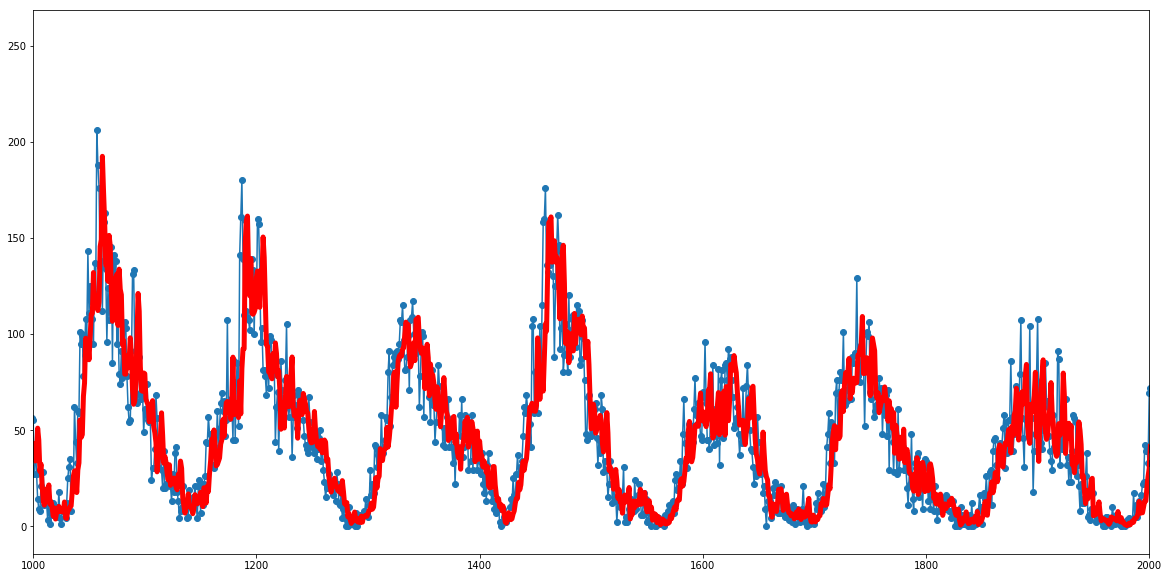

In [6]:
def weighted_average(series, weights):
    results = [series[0]]
    weights.reverse()
    for n in range(1, len(series)):
        result = 0.0
        for k in range(len(weights)):
            result += series[n-k-1] * weights[k]            
        results.append(result)
    return results

Y_wa = weighted_average(Y, [.6,.2,.1,.07,.03])

plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_wa)], Y_wa, "red", linewidth=5)
plt.xlim(1000,2000)
plt.show()

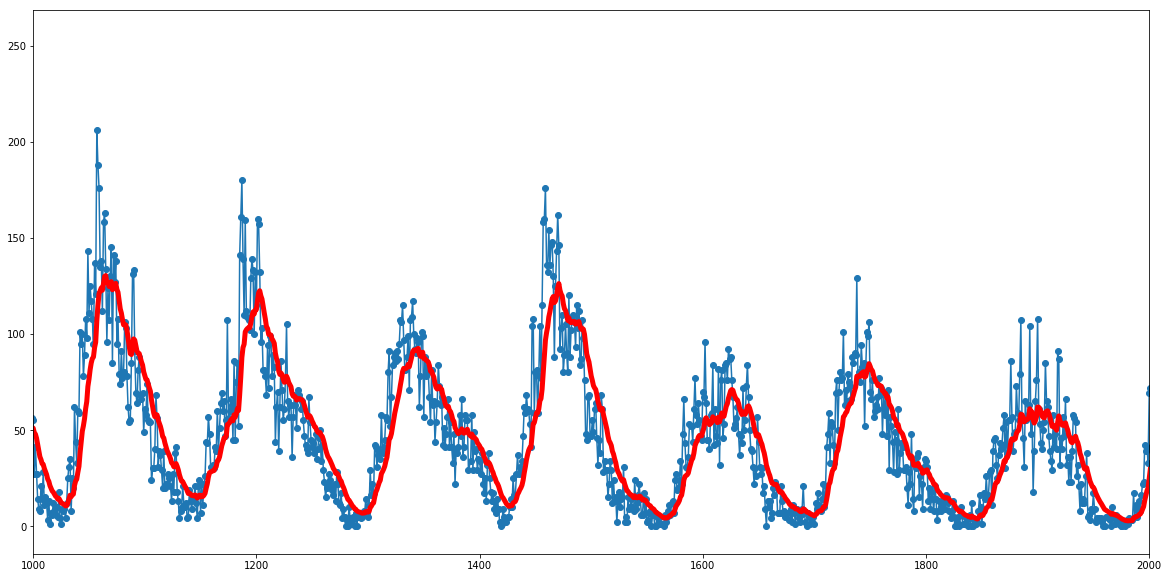

In [11]:
def exp_smoothing(series, alpha):
    results = [series[0]]
    for n in range(1,len(series)):
        results.append(alpha*series[n]+(1-alpha)*results[n-1])
    return results

Y_es = exp_smoothing(Y, .1)

plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_es)], Y_es, "red", linewidth=5)
plt.xlim(1000,2000)
plt.show()

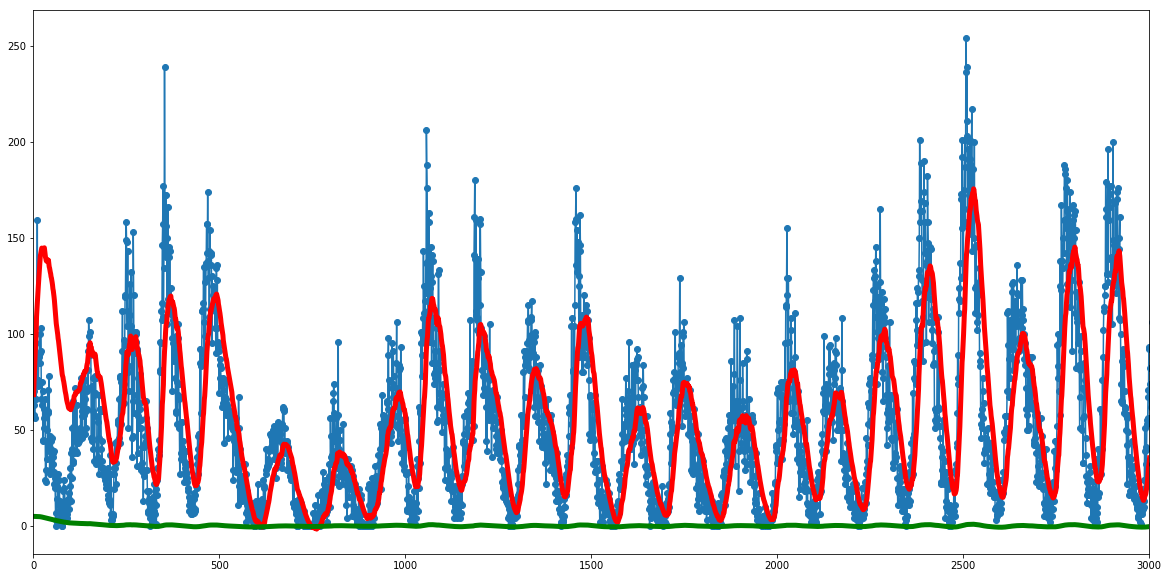

In [19]:
def dexp_smoothing(series,alpha,beta):
    results = []
    trends = []
    for n in range(1,len(series)):
        if n == 1:
            level, trend = series[0], series[1]-series[0]
        else:
            last_level, level = level, alpha*series[n]+\
            (1-alpha)*(level+trend)
            trend = beta*(level-last_level)+(1-beta)*trend
            results.append(level+trend)
            trends.append(trend)
    return results, trends

Y_res, Y_tr = dexp_smoothing(Y, .05, .01)

plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_res)], Y_res, "red", linewidth=5)
plt.plot(X[:len(Y_tr)], Y_tr, "green", linewidth=5)
plt.xlim(0,3000)
plt.show()
            

In [22]:
def init_trend(series,slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen]-series[i])/slen
    return sum/slen

def init_seasonal_ind(series,slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    for j in range(n_seasons):
        season_averages.append(sum(series[j*slen:j*slen+slen])/float(slen))
    for i in range(slen):
        sum_over_avg = 0.0
        for j in range(n_seasons):
            sum_over_avg += series[j*slen+i]-season_averages[j]
        seasonals[i] = sum_over_avg/n_seasons
    return seasonals

init_seasonal_ind(Y,11)
        

{0: 0.05441511893124796,
 1: -0.17855979146301756,
 2: -2.2968393613554903,
 3: -0.5871619420006523,
 4: 0.21212121212121193,
 5: -0.6767676767676768,
 6: 0.1798631476050829,
 7: 1.563375692407951,
 8: 1.3877484522645809,
 9: 0.262300423590746,
 10: 0.07950472466601455}